In [49]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Memuat Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/My Drive/BDM/collegiate_athlete_injury_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [9]:
print("Dimensi Dataset (Baris, Kolom):", df.shape)

Dimensi Dataset (Baris, Kolom): (200, 17)


In [10]:
df.dtypes

,0
Athlete_ID,object
Age,int64
Gender,object
Height_cm,int64
Weight_kg,int64
Position,object
Training_Intensity,int64
Training_Hours_Per_Week,int64
Recovery_Days_Per_Week,int64
Match_Count_Per_Week,int64


In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Kolom kategoris dalam dataset:")
print(categorical_columns)


Kolom kategoris dalam dataset:
['Athlete_ID', 'Gender', 'Position']


In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Kolom numerik dalam dataset:")
print(numeric_columns)


Kolom numerik dalam dataset:
['Age', 'Height_cm', 'Weight_kg', 'Training_Intensity', 'Training_Hours_Per_Week', 'Recovery_Days_Per_Week', 'Match_Count_Per_Week', 'Rest_Between_Events_Days', 'Fatigue_Score', 'Performance_Score', 'Team_Contribution_Score', 'Load_Balance_Score', 'ACL_Risk_Score', 'Injury_Indicator']


In [14]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,100.000000,1.000000


**Menghapus kolom yang tidak relevan**

In [16]:
# 1. Menghapus kolom yang tidak relevan
df = df.drop(columns=['Athlete_ID'])

In [35]:
# 2. Memeriksa nilai yang hilang
print("Jumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

Jumlah Nilai Hilang per Kolom:
Age                         0
Height_cm                   0
Weight_kg                   0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
ACL_Risk_Score              0
Injury_Indicator            0
Gender_Male                 0
Position_Forward            0
Position_Guard              0
dtype: int64


# 2. Memisahkan fitur dan label (target)

In [24]:
# 2. Memisahkan fitur dan label (target)
X = df.drop('Injury_Indicator', axis=1) # Change 'data' to 'df'
y = df['Injury_Indicator'] # Change 'data' to 'df'

# 3. Membagi data menjadi data latih dan data uji

In [25]:
# 3. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Menerapkan Algoritma Klasifikasi

In [28]:
# 4. Menerapkan Algoritma Klasifikasi
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 5. Membuat prediksi pada data uji

In [29]:
y_pred = model.predict(X_test)

# 6. Evaluasi Metrik

Accuracy: 92.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.00      0.00      0.00         2

    accuracy                           0.93        40
   macro avg       0.47      0.49      0.48        40
weighted avg       0.90      0.93      0.91        40



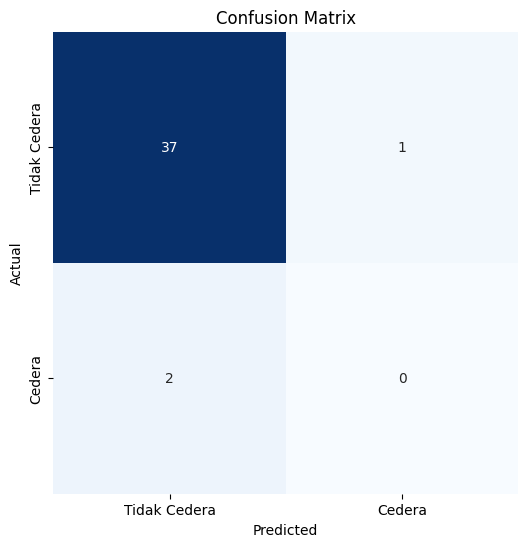

In [32]:
#1. Prediksi pada data uji
y_pred = model.predict(X_test)

# 2. Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 3. Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Tidak Cedera', 'Cedera'], yticklabels=['Tidak Cedera', 'Cedera'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#EXPLORATORY DATA ANALYSIS

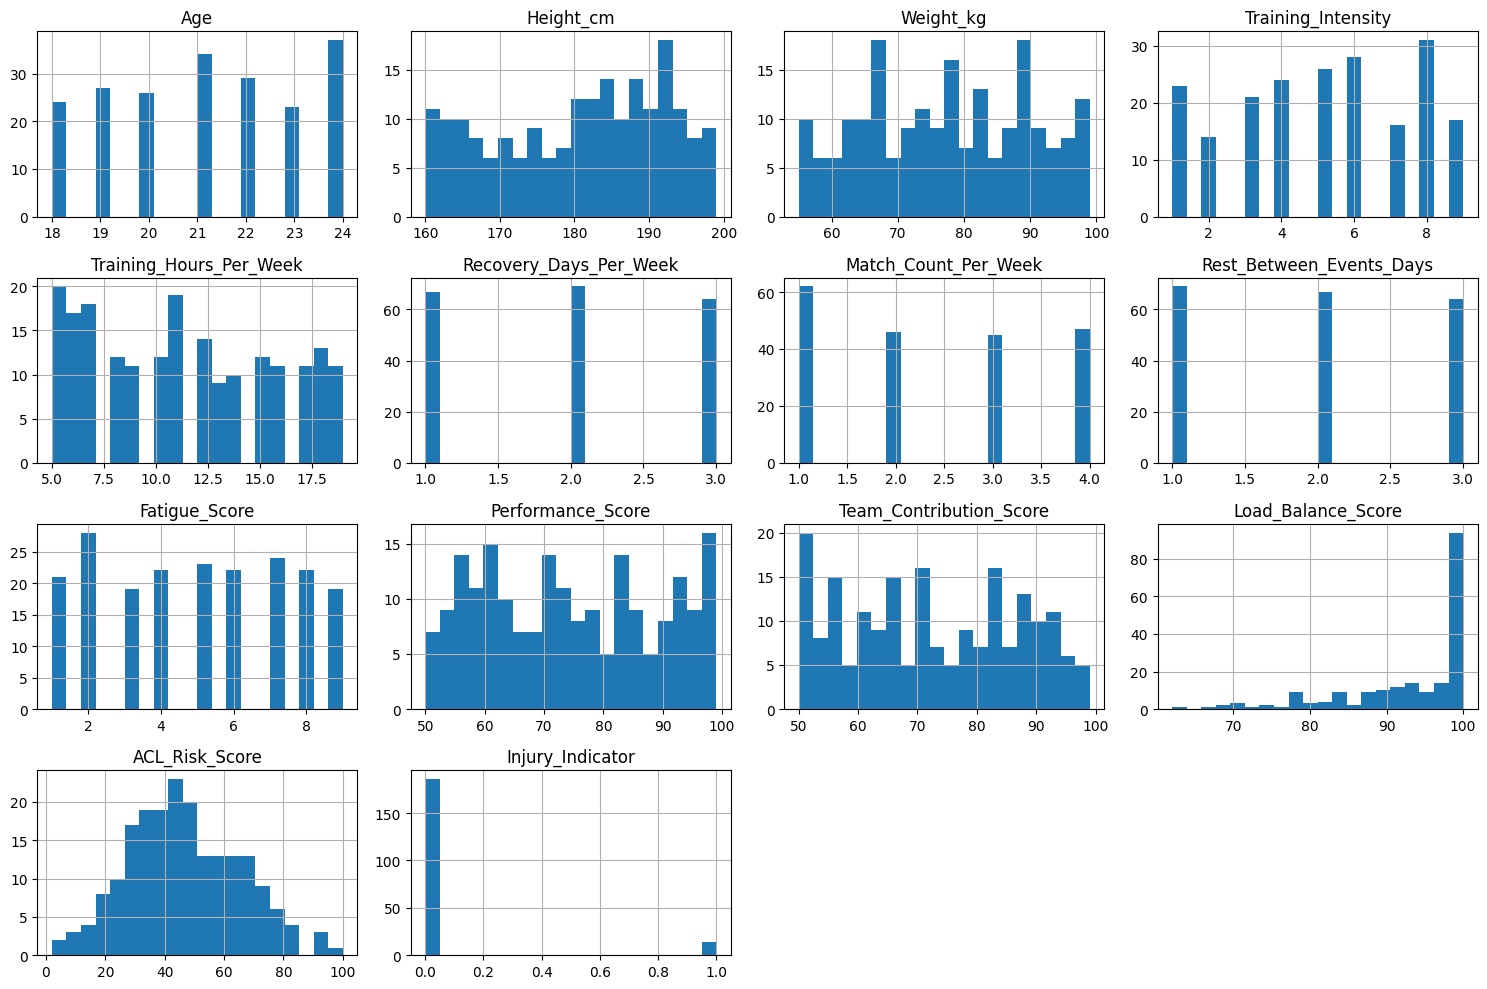

In [34]:
numerical_cols = df.select_dtypes(include=['number']).columns

df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

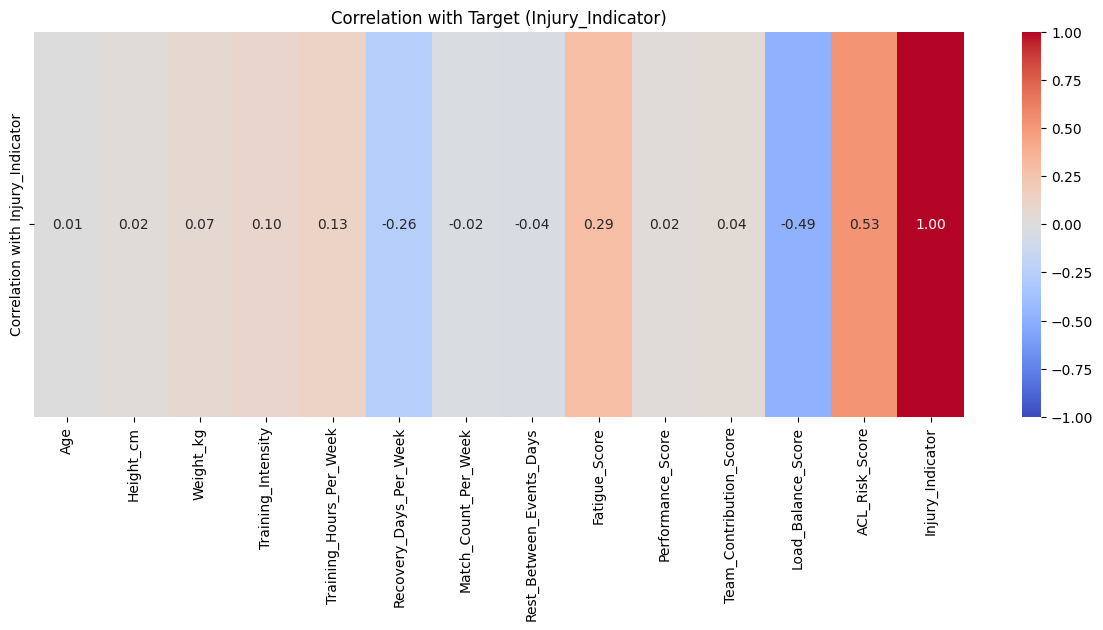

In [41]:
# Menghitung korelasi antara fitur numerik dan target 'Injury_Indicator'
correlation_target = df[numerical_cols].corrwith(df['Injury_Indicator']).to_frame()

# Menambahkan nama kolom sebagai index
correlation_target.columns = ['Correlation with Injury_Indicator']

# Membuat heatmap dari korelasi
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_target.T, annot=True, cmap="coolwarm", cbar=True, fmt='.2f', vmin=-1, vmax=1)

# Menambahkan judul dan menampilkan heatmap
plt.title('Correlation with Target (Injury_Indicator)')
plt.show()

**Evaluation metrics**

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
plt.show()

**Confusion Matrix**

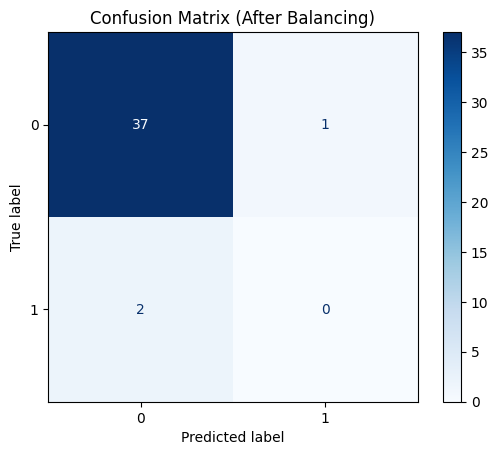

In [51]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
cmd.plot(cmap="Blues")
plt.title("Confusion Matrix (After Balancing)")
plt.show()

**Exploratory Data Analysis (EDA)**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Athlete_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Position',
       'Training_Intensity', 'Training_Hours_Per_Week',
       'Recovery_Days_Per_Week', 'Match_Count_Per_Week',
       'Rest_Between_Events_Days', 'Fatigue_Score', 'Performance_Score',
       'Team_Contribution_Score', 'Load_Balance_Score', 'ACL_Risk_Score',
       'Injury_Indicator'],
      dtype='object')


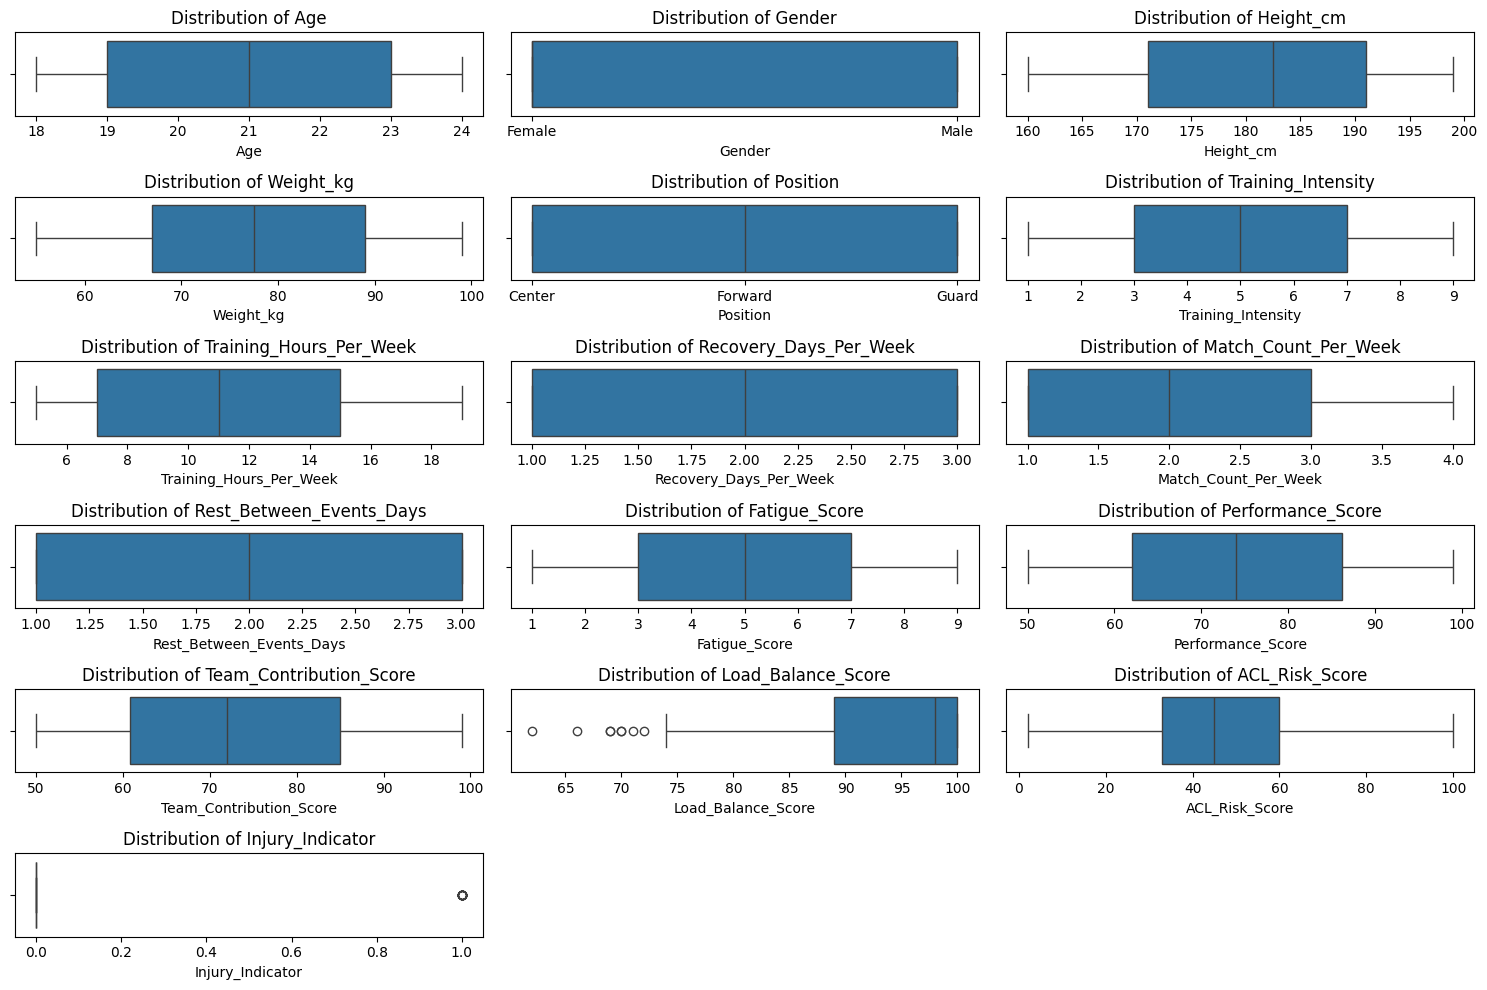

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Update the file_path to the correct path
file_path = '/content/drive/My Drive/BDM/collegiate_athlete_injury_dataset.csv'
data = pd.read_csv(file_path)

# Check the actual column names in your DataFrame
print(data.columns)

# Using the correct column name 'Height' (Capital H)
numerical_features = ['Age', 'Gender', 'Height_cm', 'Weight_kg', 'Position',
       'Training_Intensity', 'Training_Hours_Per_Week',
       'Recovery_Days_Per_Week', 'Match_Count_Per_Week',
       'Rest_Between_Events_Days', 'Fatigue_Score', 'Performance_Score',
       'Team_Contribution_Score', 'Load_Balance_Score', 'ACL_Risk_Score',
       'Injury_Indicator']

# Adjust the subplot grid to accommodate all features
num_cols = 3  # Number of columns in the grid
num_rows = int(len(numerical_features) / num_cols) + (len(numerical_features) % num_cols > 0) # Calculate number of rows needed

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**Heatmap**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


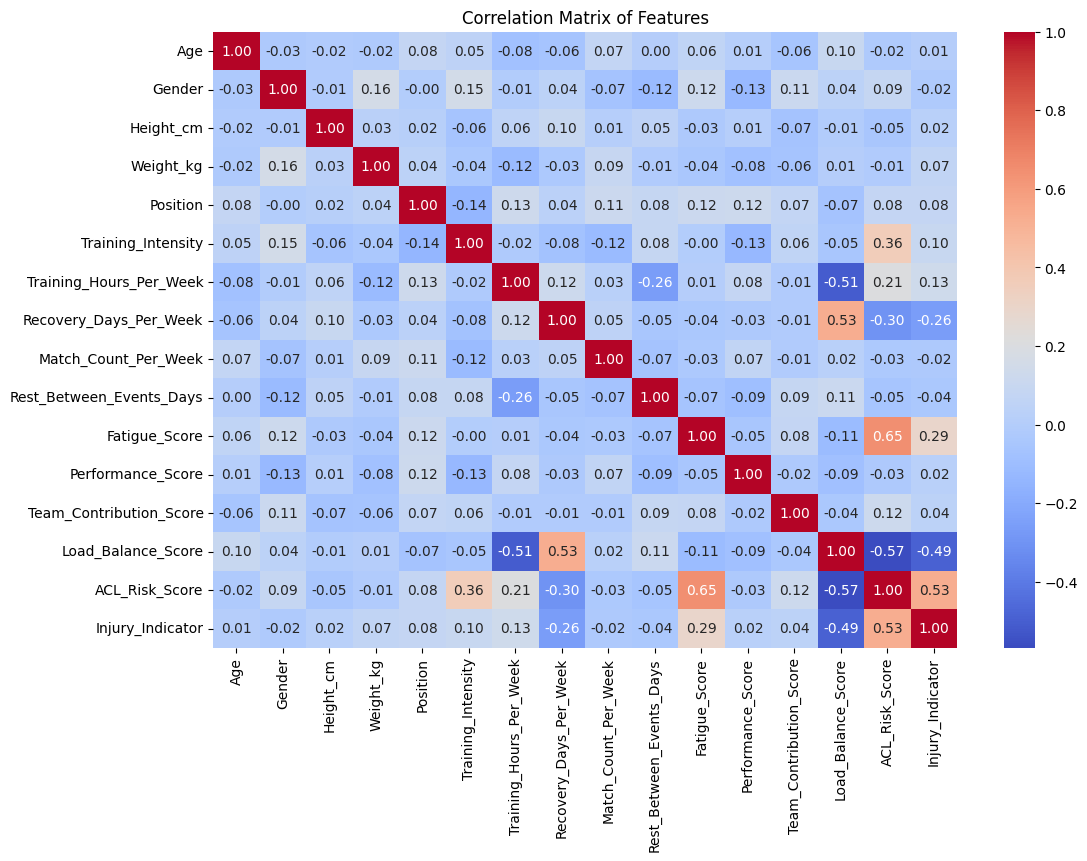

((160, 15), (40, 15), (160,), (40,))

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the dataset to avoid modifying the original
data_copy = data.copy()

# Step 1: Encoding categorical variables
le_gender = LabelEncoder()
le_position = LabelEncoder()

data_copy['Gender'] = le_gender.fit_transform(data_copy['Gender'])
data_copy['Position'] = le_position.fit_transform(data_copy['Position'])

# Step 2: Splitting features and target
X = data_copy.drop(['Athlete_ID', 'Injury_Indicator'], axis=1)
y = data_copy['Injury_Indicator']

# Step 3: Normalizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Exploratory Data Analysis (correlation heatmap)
plt.figure(figsize=(12, 8))
correlation_matrix = data_copy.drop('Athlete_ID', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

X_train.shape, X_test.shape, y_train.shape, y_test.shape


In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)

# Inisialisasi RFE dengan model
rfe = RFE(estimator=model, n_features_to_select=5)  # Pilih 5 fitur terbaik
rfe.fit(X_scaled, y)

# Hasil seleksi fitur
selected_features = [feature for feature, selected in zip(numeric_features, rfe.support_) if selected]
ranking = rfe.ranking_

print("Fitur yang Dipilih oleh RFE:", selected_features)
print("Ranking Semua Fitur:", dict(zip(numeric_features, ranking)))

# Dataset baru dengan fitur terpilih
X_selected = X[selected_features]

# Pisahkan data menjadi training dan testing
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Data Shape (Selected Features):", X_train_selected.shape)
print("Testing Data Shape (Selected Features):", X_test_selected.shape)


Fitur yang Dipilih oleh RFE: []
Ranking Semua Fitur: {'Training_Hours_Per_Week': 10, 'Match_Count_Per_Week': 4}

Training Data Shape (Selected Features): (160, 0)
Testing Data Shape (Selected Features): (40, 0)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **1. Clustering dengan K-Means**

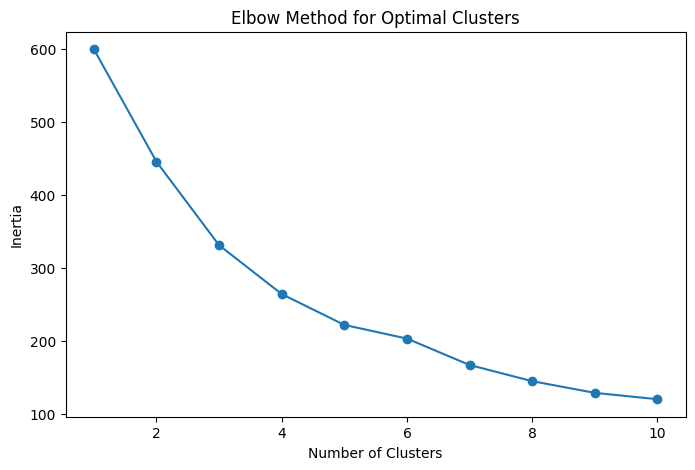

   Cluster  Training_Intensity  Fatigue_Score  Performance_Score
0        0                   2              1                 99
1        2                   8              4                 55
2        1                   8              6                 58
3        0                   1              7                 82
4        0                   3              2                 90


In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Load the dataset
# Update the file_path to the correct path
file_path = '/content/drive/My Drive/BDM/collegiate_athlete_injury_dataset.csv'
df = pd.read_csv(file_path)  # Define 'data' here

# Memilih fitur untuk clustering
clustering_features = ['Training_Intensity', 'Fatigue_Score', 'Performance_Score']
X_clustering = df[clustering_features] # Use df instead of data

# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Menentukan jumlah kluster dengan metode Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot hasil Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Membuat model K-Means dengan jumlah kluster optimal
optimal_clusters = 3  # Pilih jumlah kluster berdasarkan plot Elbow
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_clustering_scaled)

# Menambahkan kolom kluster ke dataset
df['Cluster'] = clusters # Use df instead of data
print(df[['Cluster'] + clustering_features].head()) # Use df instead of data

# **2. Association Rule Mining dengan Apriori**

In [60]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Assuming your dataset is in a file named 'collegiate_athlete_injury_dataset.csv'
file_path = '/content/drive/My Drive/BDM/collegiate_athlete_injury_dataset.csv'
data = pd.read_csv(file_path)  # Define 'data' here by reading the CSV file


# Membuat data biner untuk asosiasi
association_data = data[['Fatigue_Score', 'ACL_Risk_Score', 'Injury_Indicator']]

# Menjadikan data dalam format biner (0/1)
# Aturan: Skor lebih besar dari median dianggap '1' (berisiko tinggi)
association_data = association_data.apply(lambda x: (x > x.median()).astype(int))

# Mencari itemset yang sering muncul
frequent_itemsets = apriori(association_data, min_support=0.2, use_colnames=True)

# Menghitung num_itemsets
num_itemsets = len(frequent_itemsets)

# Menampilkan aturan asosiasi
# Pass num_itemsets to association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=num_itemsets)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        antecedents       consequents  support  confidence      lift
0  (ACL_Risk_Score)   (Fatigue_Score)     0.34    0.701031  1.611565
1   (Fatigue_Score)  (ACL_Risk_Score)     0.34    0.781609  1.611565


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
